In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./data/face01.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./data/haarcascade_eye.xml')

face cascade, detection

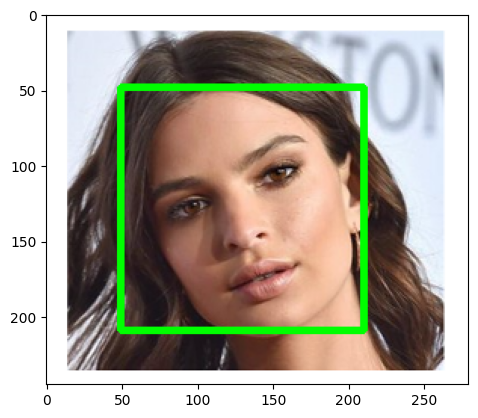

In [60]:
faces = face_cascade.detectMultiScale(image_gray, 1.1, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x,y), (x+w, y+h), (0, 255, 0), 3)
    
plt.imshow(image)
plt.show()

face roi

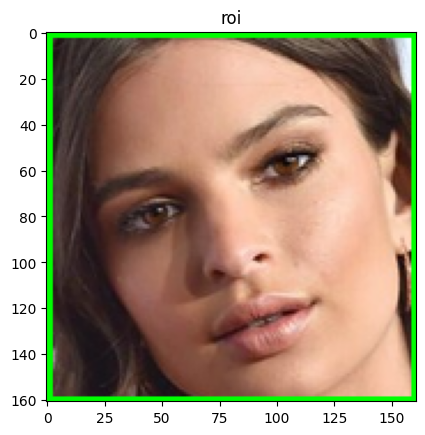

In [61]:
roi = image[y : (y+h), x : (x+w)]
roi_gray = image_gray[y : (y+h), x : (x+w)]

plt.imshow(roi)
plt.title('roi')
plt.show()

eye cascade, detection

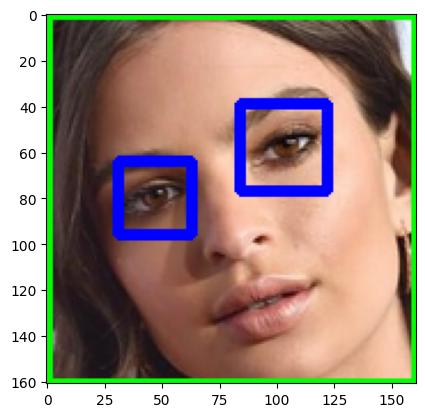

In [62]:
eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 4)

""" # 주석처리 된 이 부분을  아래 덩어리로 대체해봤음  

index = 0

for (ex, ey, ew, eh) in eyes:
    if index == 0:
        eye_1 = (ex, ey, ew, eh)
    elif index == 1:
        eye_2 = (ex, ey, ew, eh)
        
    cv2.rectangle(roi, (ex, ey), (ex+ew, ey+eh), (0, 0, 255), 3)
    
    index += 1
    
"""
    
#
for i, (ex, ey, ew, eh) in enumerate(eyes):
    if i == 0:
        eye_1 = (ex, ey, ew, eh)
    elif i == 1:
        eye_2 = (ex, ey, ew, eh)
        
    cv2.rectangle(roi, (ex, ey), (ex+ew, ey+eh), (0, 0, 255), 3)
# 

plt.imshow(roi)
plt.show()

left eye, right eye 잇는 선 그리기

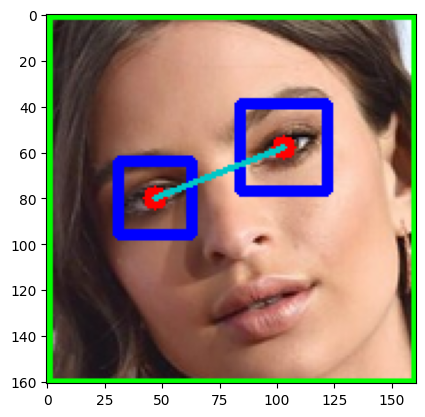

In [63]:
if eye_1[0] < eye_2[0]:
    left_eye, right_eye = eye_1, eye_2
else:
    left_eye, right_eye = eye_2, eye_1
    
left_eye_center = (int(left_eye[0] + left_eye[2] / 2), int(left_eye[1] + left_eye[3] / 2))
left_eye_x = left_eye_center[0]
left_eye_y = left_eye_center[1]

right_eye_center = (int(right_eye[0] + right_eye[2] / 2), int(right_eye[1] + right_eye[3] / 2))
right_eye_x = right_eye_center[0]
right_eye_y = right_eye_center[1]

cv2.circle(roi, left_eye_center, 5, (255, 0, 0), -1)
cv2.circle(roi, right_eye_center, 5, (255, 0, 0), -1)
cv2.line(roi, right_eye_center, left_eye_center, (0, 200, 200), 2)

plt.imshow(roi)
plt.show()

In [64]:
print(left_eye)
print(right_eye)

(31, 64, 32, 32)
(84, 39, 38, 38)


직각삼각형 그리기

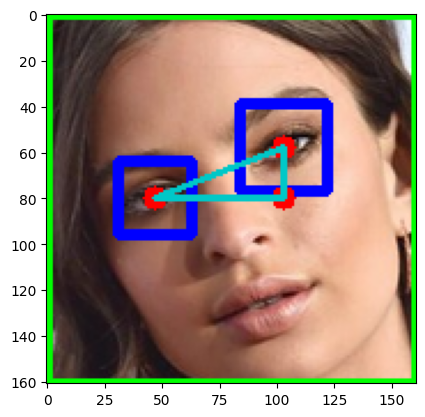

In [65]:
# A: 직각인 꼭짓점?

if left_eye_y > right_eye_y:
    A = (right_eye_x, left_eye_y)
    direction = -1
else:
    A = (left_eye_x, right_eye_y)
    direction = 1
    
cv2.circle(roi, A, 5, (255, 0, 0), -1)
cv2.line(roi, right_eye_center, left_eye_center, (0, 200, 200), 2)
cv2.line(roi, left_eye_center, A, (0, 200, 200), 2)
cv2.line(roi, right_eye_center, A, (0, 200, 200), 2)

plt.imshow(roi)
plt.show()

image rotation

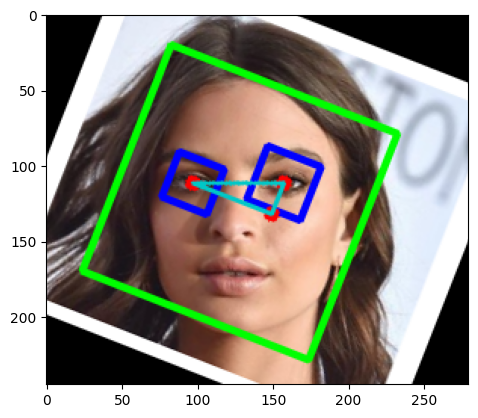

In [66]:
delta_x = right_eye_x - left_eye_x
delta_y = right_eye_y - left_eye_y

angle = np.degrees(np.arctan(delta_y / delta_x))

height, width, _ = image.shape

center = (width // 2, height // 2)

M = cv2.getRotationMatrix2D(center, angle, 1.0)

image_rotated = cv2.warpAffine(image, M, (width, height))

plt.imshow(image_rotated)
plt.show()